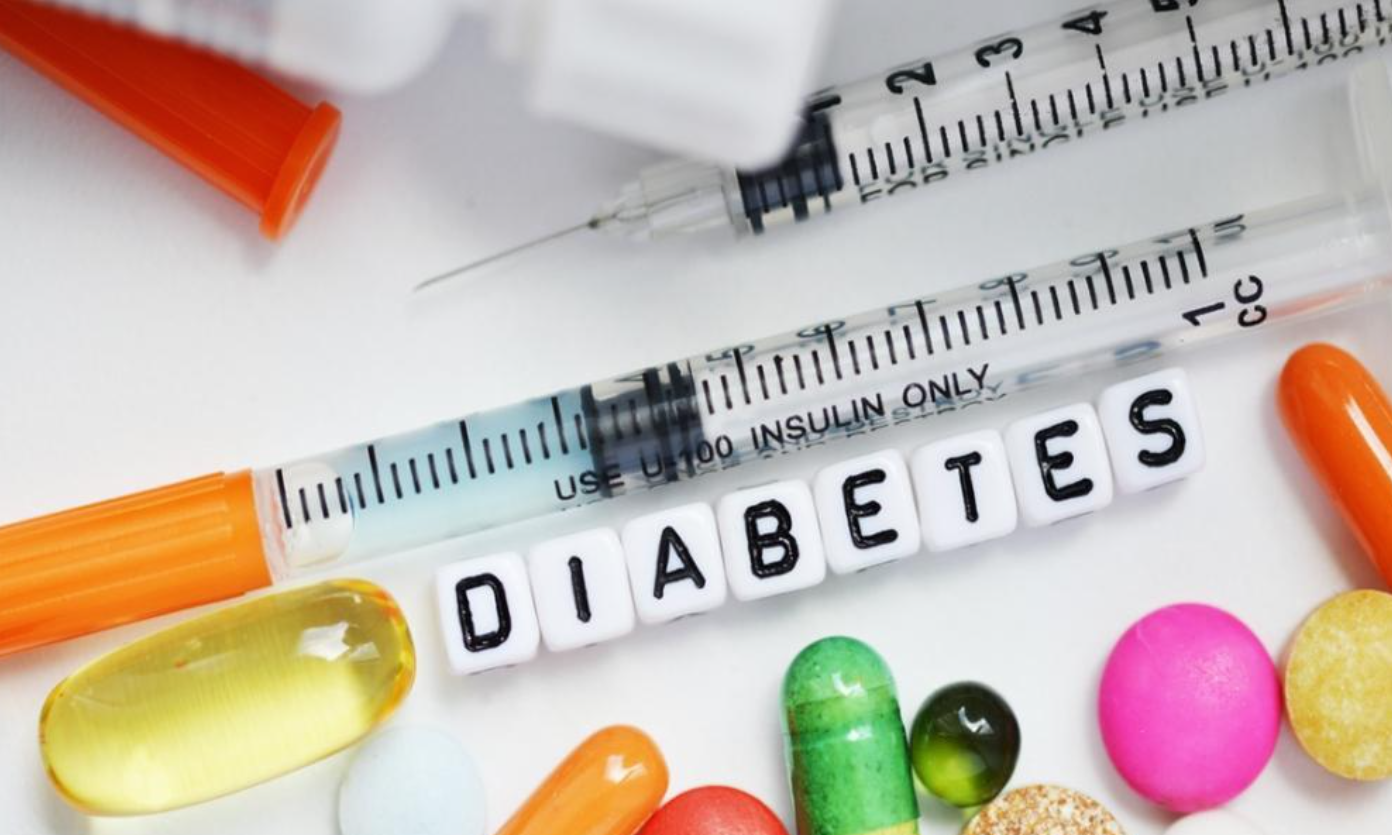

# **Overview:**

This project focuses on detecting individuals at risk of diabetes, a chronic condition characterized by high blood sugar levels that can lead to serious health complications like heart disease, kidney failure, and nerve damage. The model uses patient data to predict the likelihood of developing diabetes, which can be crucial for early intervention and lifestyle changes. Given the increasing prevalence of diabetes worldwide, such models offer a valuable tool for healthcare providers in managing and preventing the disease effectively.

**About the dataset**

The dataset from Mendeley titled "Early-stage diabetes risk prediction dataset" contains medical records aimed at predicting diabetes risk. It includes attributes like glucose levels, BMI, blood pressure, and other health indicators from a sample population. This dataset is valuable for building machine learning models to predict the onset of diabetes by analyzing patterns in these attributes. It helps researchers and healthcare providers identify key risk factors for diabetes and develop early intervention strategies.

For more details, you can access the dataset here: https://data.mendeley.com/datasets/wj9rwkp9c2/1

## **Data Cleaning**

**Import Required Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import f1_score, jaccard_score, accuracy_score
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
import itertools
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import xgboost as xgb

**Download the dataset from Mendeley Data website.**

In [2]:
!wget https://data.mendeley.com/public-files/datasets/wj9rwkp9c2/files/2eb60cac-96b8-46ea-b971-6415e972afc9/file_downloaded
df = pd.read_csv('/content/file_downloaded')
df.head()

--2024-10-18 17:21:22--  https://data.mendeley.com/public-files/datasets/wj9rwkp9c2/files/2eb60cac-96b8-46ea-b971-6415e972afc9/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/e205d80e-2bc6-49ed-bfcc-4215b6b516fd [following]
--2024-10-18 17:21:23--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/e205d80e-2bc6-49ed-bfcc-4215b6b516fd
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 52.218.91.80, 52.218.90.80, 52.92.19.42, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|52.218.91.80|:443.

ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N

**Data Cleaning**

Lets start checking the basic info about our dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


The data consist of medical information, laboratory analysis… etc. The data that have been entered initially into the system are: No. of Patient, Sugar Level Blood, Age, Gender, Creatinine ratio(Cr), Body Mass Index (BMI), Urea, Cholesterol (Chol), Fasting lipid profile, including total, LDL, VLDL, Triglycerides(TG) and HDL Cholesterol , HBA1C, Class (the patient's diabetes disease class may be Diabetic, Non-Diabetic, or Predict-Diabetic).

Lets check the the unique values of CLASS field.

In [4]:
df['CLASS'].value_counts()

CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64

Lets standardize the categories of the CLASS field by trimming extra spaces.

In [5]:
df['CLASS'] = df['CLASS'].str.replace(' ', '')
df['CLASS'].value_counts()

CLASS
Y    844
N    103
P     53
Name: count, dtype: int64

Lets change the data type to category.

In [6]:
df['CLASS'] = df['CLASS'].astype('category')

Now lets check the GENDER column.

In [7]:
df['Gender'].value_counts()

Gender
M    565
F    434
f      1
Name: count, dtype: int64

Same goes with GENDER, we have to trim the extra spaces.

In [8]:
df['Gender'] = df['Gender'].apply(str.upper)
df['Gender'].value_counts()

Gender
M    565
F    435
Name: count, dtype: int64

Lets also change its data type to category.

In [9]:
df['Gender'] = df['Gender'].astype('category')

Also, we need to drop the column ID as we will not use it.

In [10]:
df = df.drop(columns=['ID'])

Now lets check if there are duplicated values.

In [11]:
df.duplicated().sum()

0

Finally, lets check if there are null values.

In [12]:
df.isnull().sum()

No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

## **Explanatory Data Analysis**

Now lets check the basic stattistics information of our dataset.

In [13]:
df.describe()

No_Pation          AGE         Urea           Cr        HbA1c  \
count  1.000000e+03  1000.000000  1000.000000  1000.000000  1000.000000   
mean   2.705514e+05    53.528000     5.124743    68.943000     8.281160   
std    3.380758e+06     8.799241     2.935165    59.984747     2.534003   
min    1.230000e+02    20.000000     0.500000     6.000000     0.900000   
25%    2.406375e+04    51.000000     3.700000    48.000000     6.500000   
50%    3.439550e+04    55.000000     4.600000    60.000000     8.000000   
75%    4.538425e+04    59.000000     5.700000    73.000000    10.200000   
max    7.543566e+07    79.000000    38.900000   800.000000    16.000000   

              Chol           TG          HDL          LDL         VLDL  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      4.862820     2.349610     1.204750     2.609790     1.854700   
std       1.301738     1.401176     0.660414     1.115102     3.663599   
min       0.000000     0.300000     0.200000     0.300000     0.100000   
25%       4.000000     1.500000     0.900000     1.800000     0.700000   
50%       4.800000     2.000000     1.100000     2.500000     0.900000   
75%       5.600000     2.900000     1.300000     3.300000     1.500000   
max      10.300000    13.800000     9.900000     9.900000    35.000000   

               BMI  
count  1000.000000  
mean     29.578020  
std       4.962388  
min      19.000000  
25%      26.000000  
50%      30.000000  
75%      33.000000  
max      47.750000

Now lets check the distribution of each numerical variables.

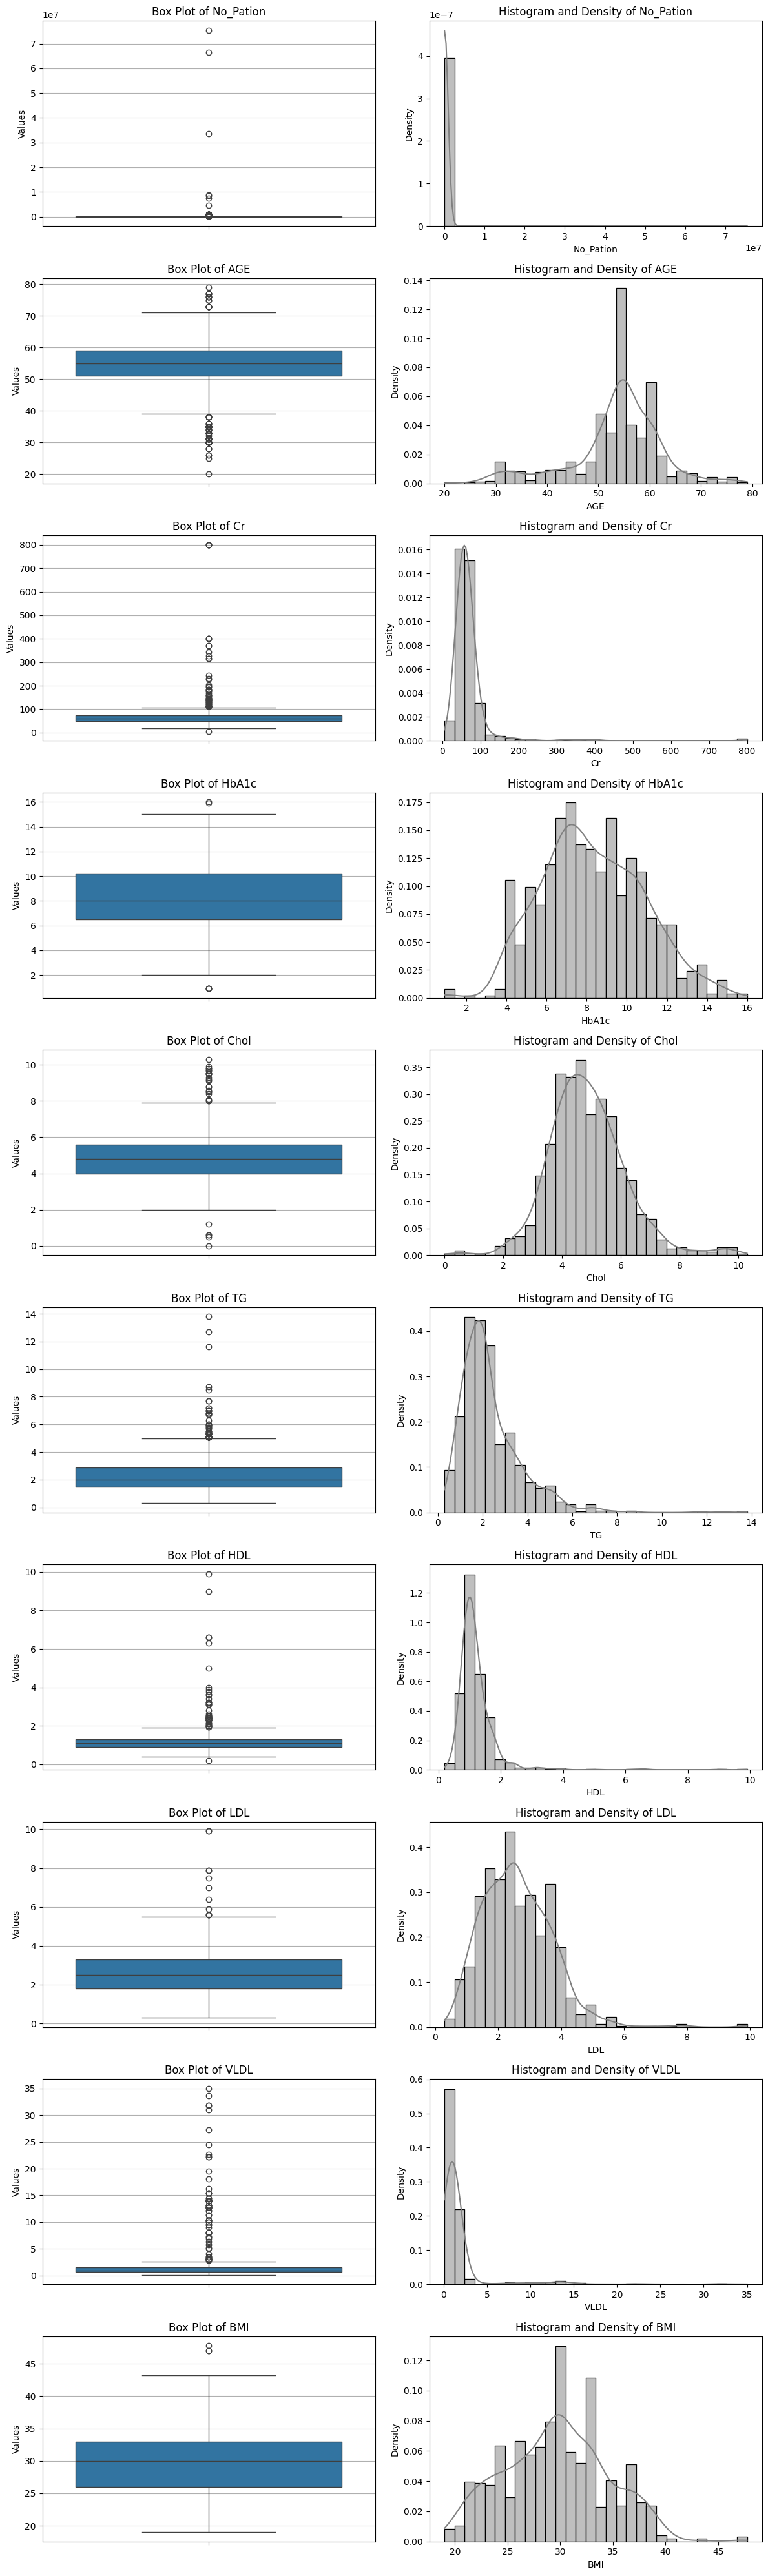

In [14]:
def plot_box_and_histograms(df, columns):
    num_cols = len(columns)
    num_rows = num_cols
    plt.figure(figsize=(12, num_rows * 4))

    for i, column in enumerate(columns, 1):
        plt.subplot(num_rows, 2, 2 * i - 1)
        sns.boxplot(data=df[column])
        plt.title(f'Box Plot of {column}')
        plt.ylabel('Values')
        plt.grid(axis='y')

        plt.subplot(num_rows, 2, 2 * i)
        sns.histplot(df[column], kde=True, bins=30, color='gray', stat='density')
        plt.title(f'Histogram and Density of {column}')
        plt.xlabel(column)
        plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

columns_to_plot = ['No_Pation', 'AGE', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
plot_box_and_histograms(df, columns_to_plot)

There are outliers on our dataset but we don't have valid ways to determine that the value is valid or not so for now we will retain it. Now lets check the pattern of each column.

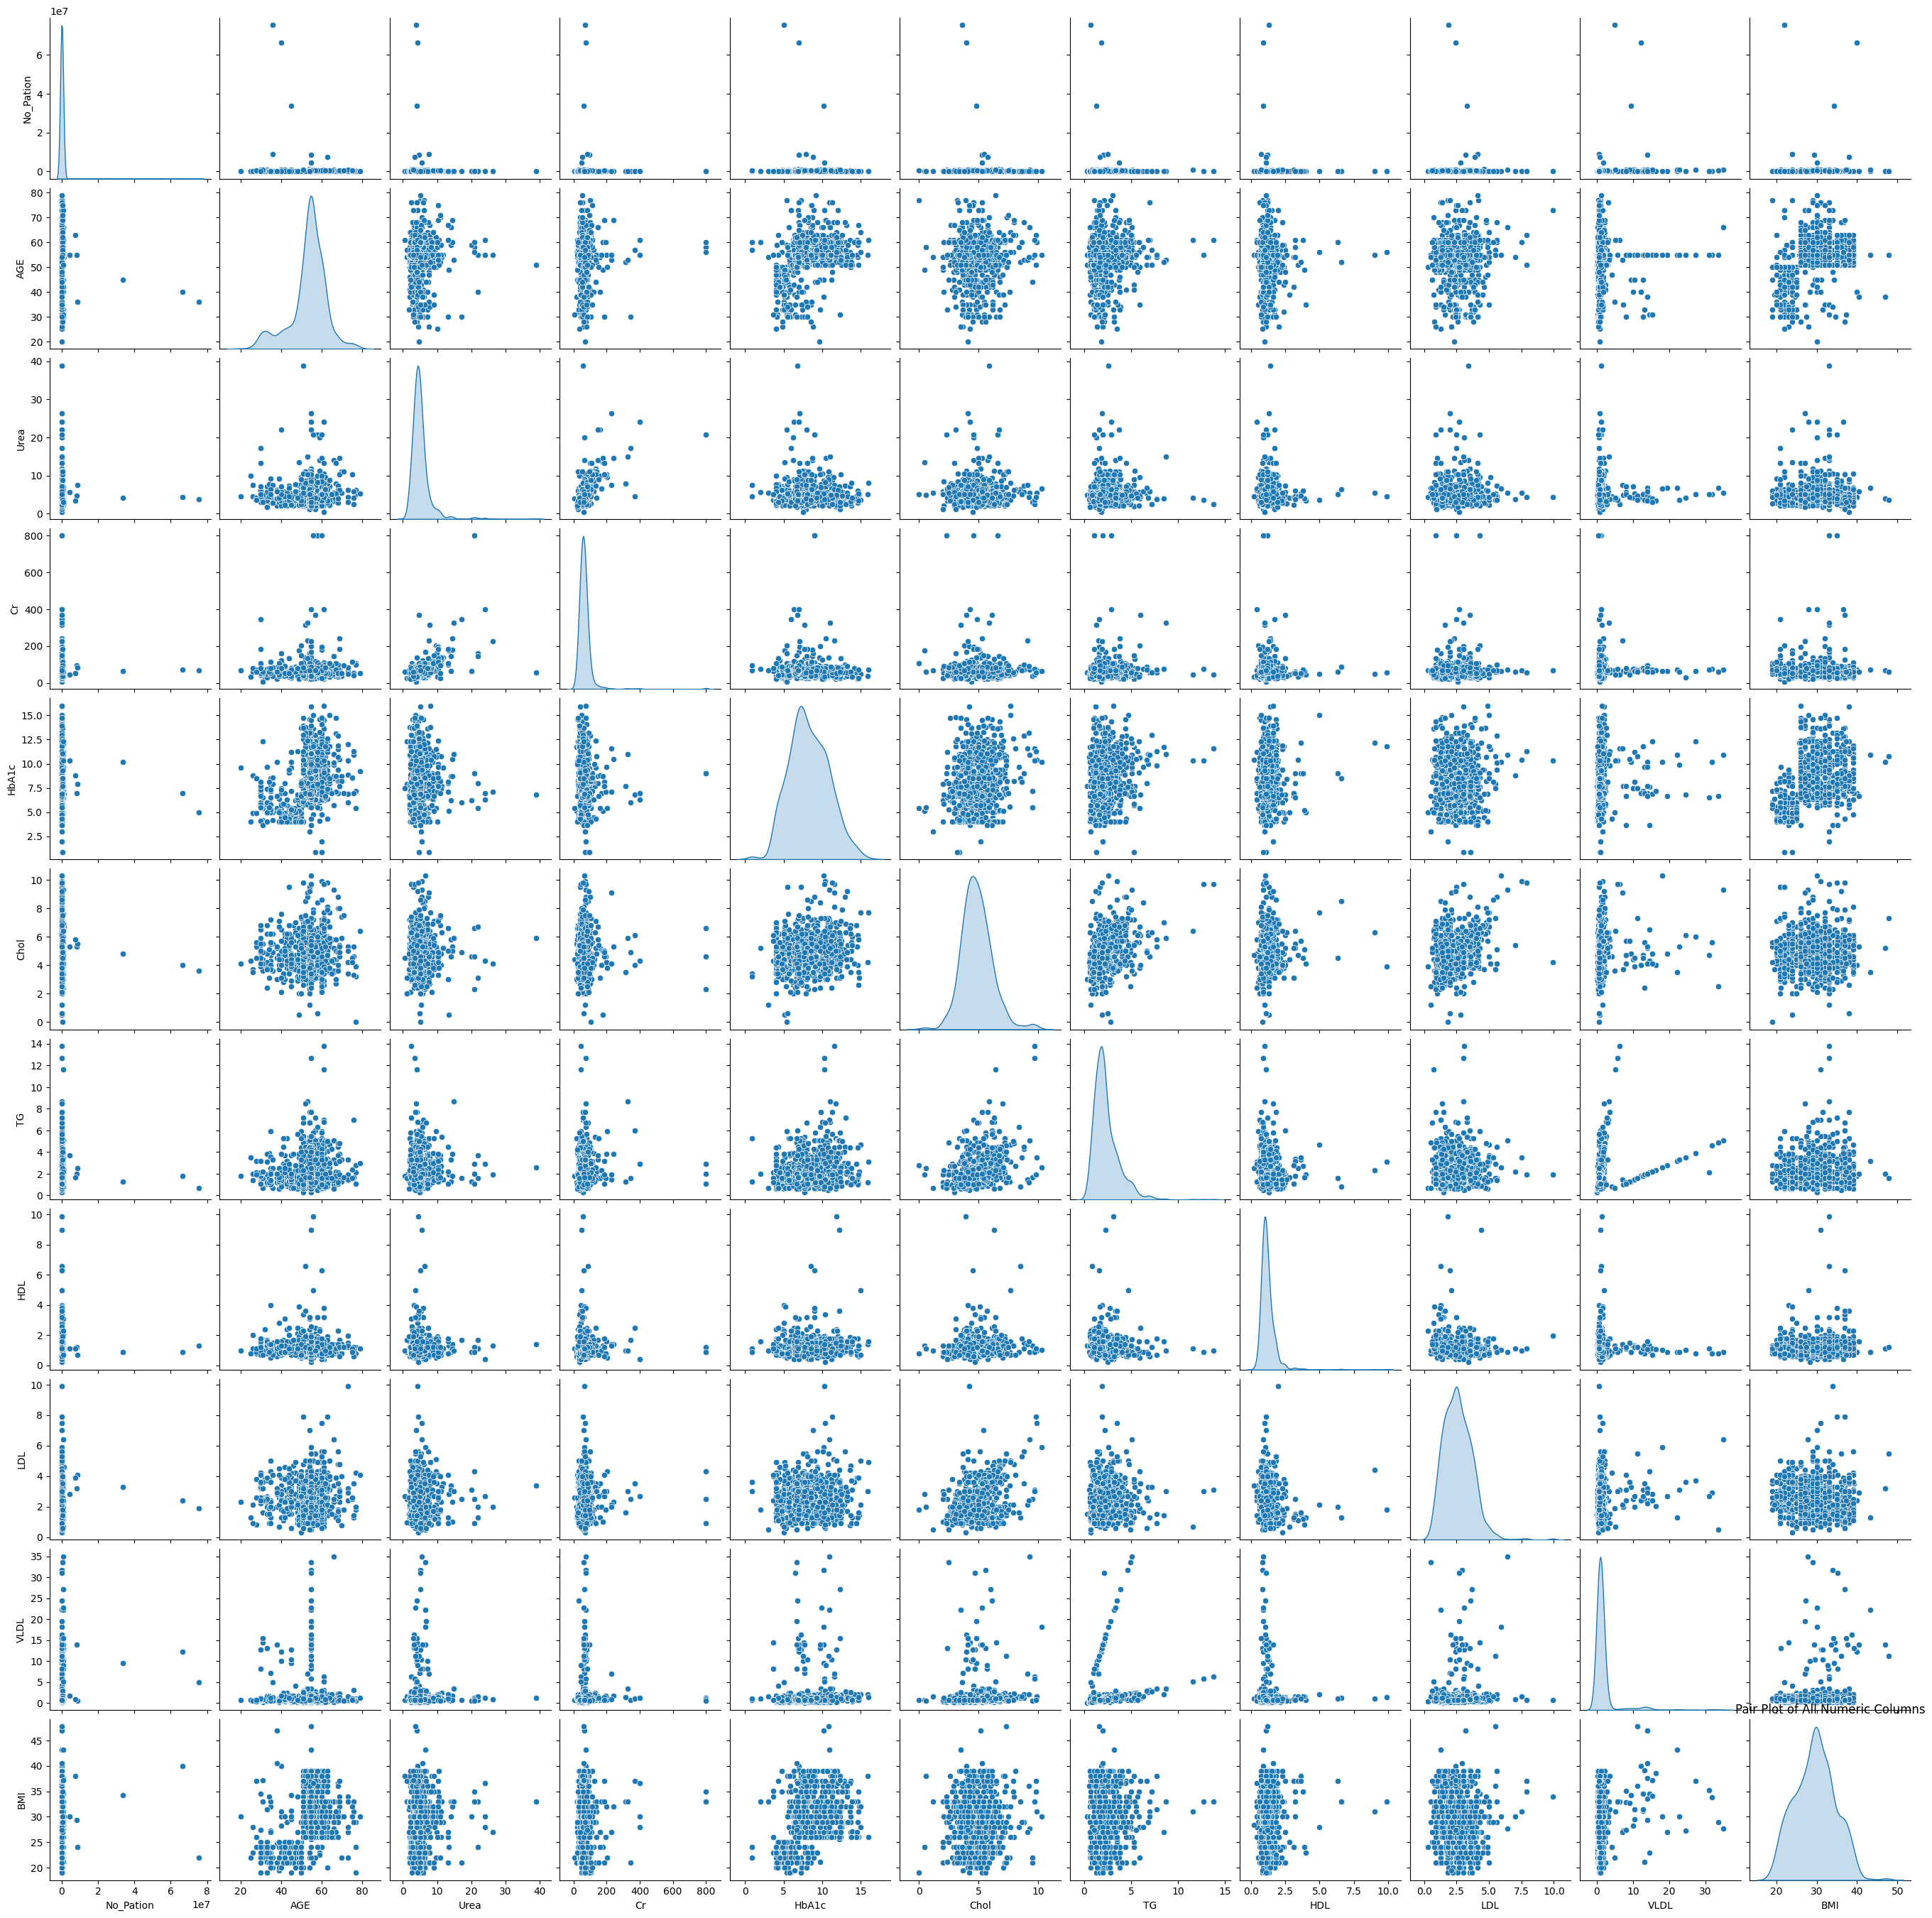

In [15]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(df[numeric_columns], diag_kind='kde')
plt.title('Pair Plot of All Numeric Columns')
plt.show()

Lets also check the correlation between all numeric variables.

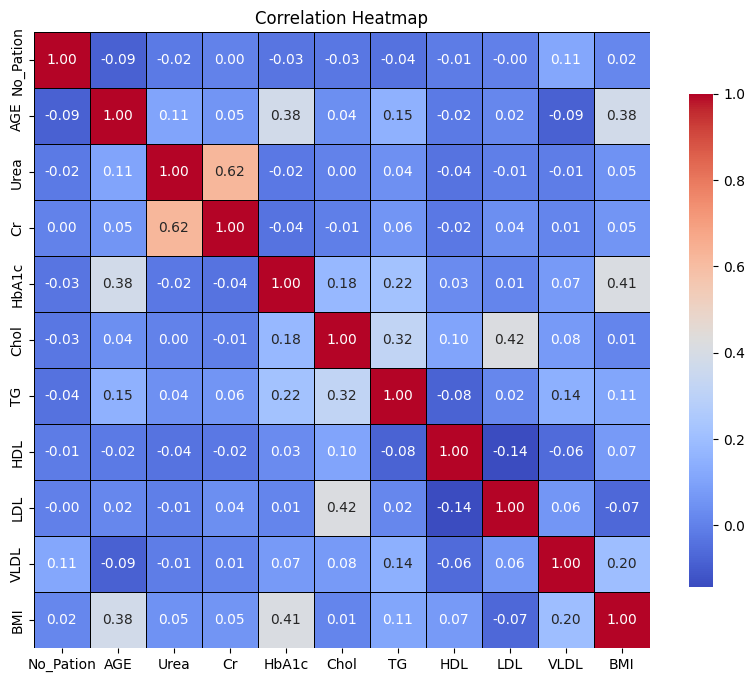

In [16]:
corr = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            cbar_kws={"shrink": .8}, linewidths=.5, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()

Lets check the distribution of CLASS and GENDER

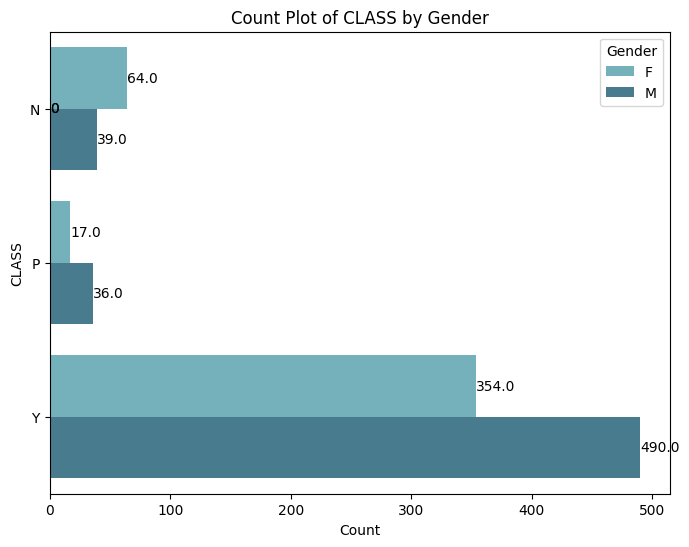

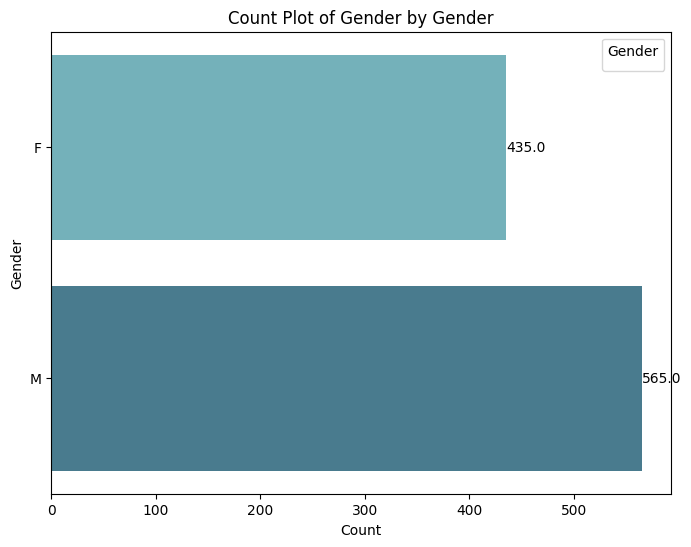

In [17]:
def plot_count_per_feature(df, features, hue, palette='GnBu_d'):
    for feature in features:
        plt.figure(figsize=(8, 6))
        count_plot = sns.countplot(data=df, y=feature, hue=hue, palette=palette)
        plt.xlabel('Count')
        plt.ylabel(feature)
        plt.title(f'Count Plot of {feature} by {hue}')

        for p in count_plot.patches:
            count_plot.annotate(f'{p.get_width()}',
                                (p.get_width(), p.get_y() + p.get_height() / 2),
                                ha='left', va='center')

        plt.legend(title=hue)
        plt.show()

categorical_features = ['CLASS', 'Gender']
plot_count_per_feature(df, categorical_features, hue='Gender')

**Key Insights**
* *Outliers Detected*: The dataset contains outliers that may impact analysis and interpretations.
* *Gender Distribution*: The dataset shows a higher prevalence of male patients (565) compared to female patients (435), indicating a gender imbalance.
* *Diabetes Prevalence*: A significant portion of the patients in the dataset are diagnosed with diabetes, while the numbers for pre-diabetic and non-diabetic patients are relatively low.
* *Gender and Diabetes Correlation*: The analysis suggests that a higher proportion of male patients are diabetic compared to their female counterparts.
* *Strong Correlation Between Cr and Urea*: There is a strong positive correlation between creatinine (Cr) and urea levels, indicating that these two variables may be interrelated.
* *Weak Correlations Observed*: The correlations between age and HbA1c, as well as between LDL and cholesterol (Chol), are weak, suggesting that these variables may not have a significant linear relationship in this dataset.

## **ML Development**

**Feature Engineering**

Lets perform binning for the AGE column.

In [18]:
age_bins = ["[{0} - {1})".format(age, age + 10) for age in range(20, 100, 10)]
df['age_range'] = pd.cut(x=df['AGE'], bins=8, labels=age_bins)
df.head()

No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  \
0      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0   
1      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0   
2      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0   
3      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0   
4      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0   

  CLASS  age_range  
0     N  [60 - 70)  
1     N  [20 - 30)  
2     N  [60 - 70)  
3     N  [60 - 70)  
4     N  [30 - 40)

**Feature Selection**

Now lets drop the columns No_Pation and AGE columns.

In [19]:
df2 = df.drop(['No_Pation','AGE'], axis=1)
df2.head()

Gender  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI CLASS  age_range
0      F   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N  [60 - 70)
1      M   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0     N  [20 - 30)
2      F   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N  [60 - 70)
3      F   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N  [60 - 70)
4      M   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0     N  [30 - 40)

**Train-Test Split**

Now lets split the dataset for training and testing.

In [20]:
X = df2.drop('CLASS', axis=1)
y = df2['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (800, 11)
X_test shape: (200, 11)
y_train shape: (800,)
y_test shape: (200,)


**Categorical Encoding**

Lets perform label encoding for GENDER and AGE columns.

In [21]:
le = LabelEncoder()
X_train['Gender'] = le.fit_transform(X_train['Gender'])
X_test['Gender'] = le.transform(X_test['Gender'])

X_train['age_range'] = le.fit_transform(X_train['age_range'])
X_test['age_range'] = le.transform(X_test['age_range'])

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
X_train.head()

Gender  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  age_range
29        0   4.3  49    4.0   5.6  1.4  1.4  3.6   0.6  22.0          3
535       1   2.7  38    8.8   4.8  1.3  1.7  1.6   2.0  26.0          4
695       1   2.9  35   11.5   4.9  2.1  2.3  1.8   0.8  33.0          6
557       1   3.2  49    6.7   4.6  1.2  1.3  2.8   0.5  30.2          4
836       0   5.9  74   12.4   5.5  1.3  1.6  1.7   1.9  27.0          4

**Feature Standardization**

Lets normalize all numerical columns using min-max scaler.

In [22]:
scaler = MinMaxScaler()
columns_to_scale = ['Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']
columns_scaled = ['Urea_scaled','Cr_scaled','HbA1c_scaled','Chol_scaled','TG_scaled','HDL_scaled','LDL_scaled','VLDL_scaled','BMI_scaled']
scale_values = X_train[columns_to_scale].values
scaled_array = scaler.fit_transform(scale_values)
X_train_scaled = pd.DataFrame(scaled_array, columns=columns_scaled)
X_train_scaled.head()

Urea_scaled  Cr_scaled  HbA1c_scaled  Chol_scaled  TG_scaled  HDL_scaled  \
0     0.161702   0.054156      0.205298     0.565657   0.081481    0.123711   
1     0.093617   0.040302      0.523179     0.484848   0.074074    0.154639   
2     0.102128   0.036524      0.701987     0.494949   0.133333    0.216495   
3     0.114894   0.054156      0.384106     0.464646   0.066667    0.113402   
4     0.229787   0.085642      0.761589     0.555556   0.074074    0.144330   

   LDL_scaled  VLDL_scaled  BMI_scaled  
0    0.329787     0.014925    0.104348  
1    0.117021     0.056716    0.243478  
2    0.138298     0.020896    0.486957  
3    0.244681     0.011940    0.389565  
4    0.127660     0.053731    0.278261

**Model Instantiation and Evaluation**

Lets define first our generic function for model evaluation. This also includes cross validation.

In [23]:
def evaluate_classification_model(model, X_train, X_test, y_train, y_test, model_name, results_df=None, num_folds=5):
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

    print(f"{model_name} Cross-Validation: {cv_results.mean():.4f} ({cv_results.std():.4f})")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    jaccard = jaccard_score(y_test, y_pred, average='weighted')

    metrics = {
        'Model': model_name,
        'Accuracy': accuracy,
        'F1-Score': f1,
        'Jaccard Score': jaccard
    }

    metrics_df = pd.DataFrame([metrics])
    if results_df is None:
        results_df = metrics_df
    else:
        results_df = pd.concat([results_df, metrics_df], ignore_index=True)

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[0])
    axs[0].set_title('Confusion Matrix')
    axs[0].set_xlabel('Predicted')
    axs[0].set_ylabel('Actual')

    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=num_folds,
                                                            scoring='accuracy',
                                                            train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    axs[1].plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    axs[1].plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    axs[1].set_xlabel('Training Size')
    axs[1].set_ylabel('Accuracy')
    axs[1].set_title('Learning Curve')
    axs[1].legend(loc='best')

    plt.tight_layout()
    plt.show()

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    return results_df

**Logistic Regression**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Logistic Regression (Tuned) Cross-Validation: 0.9062 (0.0194)


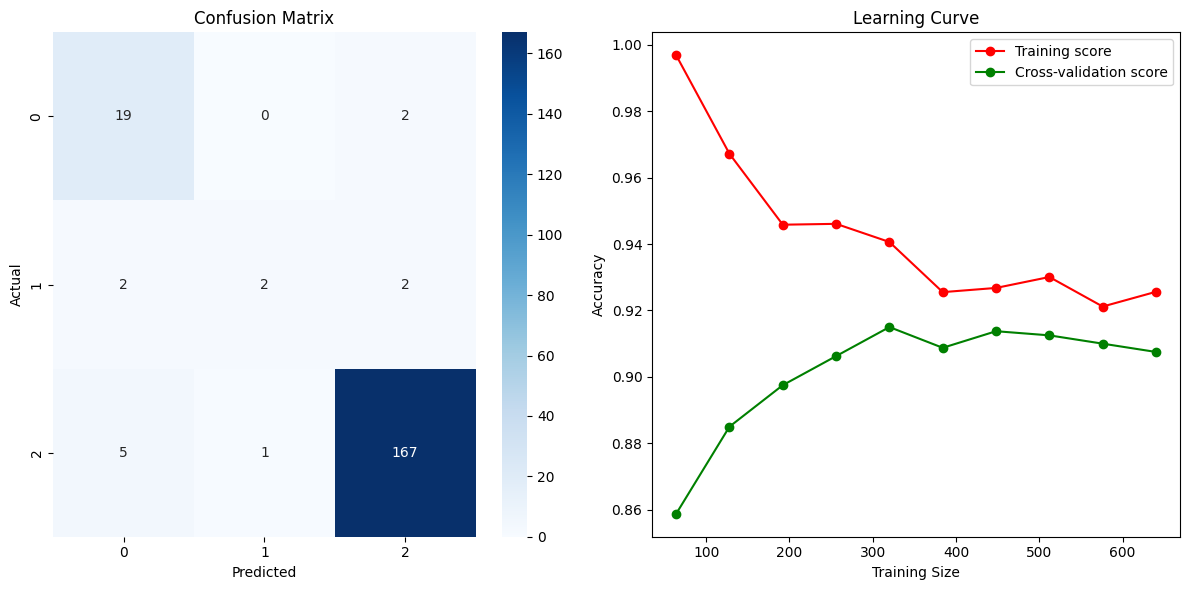

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.81        21
           1       0.67      0.33      0.44         6
           2       0.98      0.97      0.97       173

    accuracy                           0.94       200
   macro avg       0.79      0.73      0.74       200
weighted avg       0.94      0.94      0.94       200

Tuned hyperparameters (best parameters):  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy:  0.9075000000000001
Avg F1-score: 0.9381
Jaccard score: 0.8960


In [24]:
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'saga']
}

log_reg = LogisticRegression()
log_reg_cv = GridSearchCV(estimator=log_reg, param_grid=parameters, cv=10, scoring='accuracy')
log_reg_cv.fit(X_train, y_train)
yhat_log_reg = log_reg_cv.best_estimator_.predict(X_test)
results_df = pd.DataFrame()
results_df = evaluate_classification_model(log_reg_cv.best_estimator_, X_train, X_test, y_train, y_test, 'Logistic Regression (Tuned)', results_df)

print("Tuned hyperparameters (best parameters): ", log_reg_cv.best_params_)
print("Best cross-validation accuracy: ", log_reg_cv.best_score_)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat_log_reg, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat_log_reg, average='weighted'))

**kNN Classifier**

KNN (Tuned) Cross-Validation: 0.9163 (0.0151)


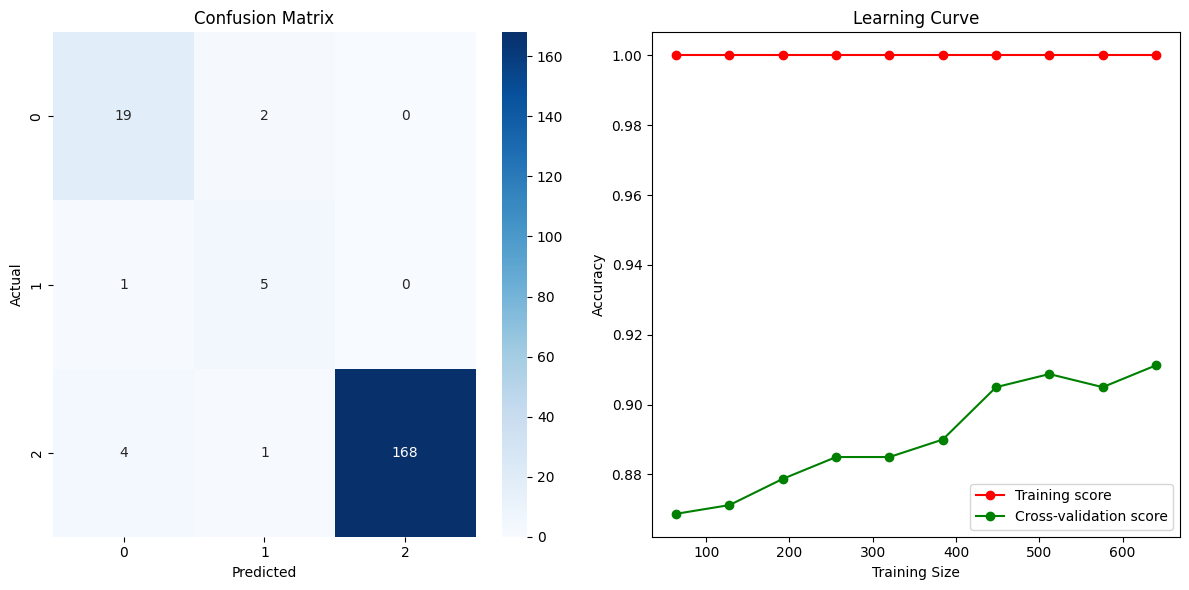

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        21
           1       0.62      0.83      0.71         6
           2       1.00      0.97      0.99       173

    accuracy                           0.96       200
   macro avg       0.81      0.90      0.85       200
weighted avg       0.97      0.96      0.96       200

Tuned hyperparameters (best parameters):  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation accuracy:  0.9249999999999998
Avg F1-score: 0.9624
Jaccard score: 0.9334


In [25]:
parameters = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, param_grid=parameters, cv=10, scoring='accuracy')
knn_cv.fit(X_train, y_train)
yhat_knn = knn_cv.best_estimator_.predict(X_test)
results_df = evaluate_classification_model(knn_cv.best_estimator_, X_train, X_test, y_train, y_test, 'KNN (Tuned)', results_df)

print("Tuned hyperparameters (best parameters): ", knn_cv.best_params_)
print("Best cross-validation accuracy: ", knn_cv.best_score_)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat_knn, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat_knn, average='weighted'))

**Gaussian NB**

GaussianNB (Tuned) Cross-Validation: 0.9363 (0.0232)


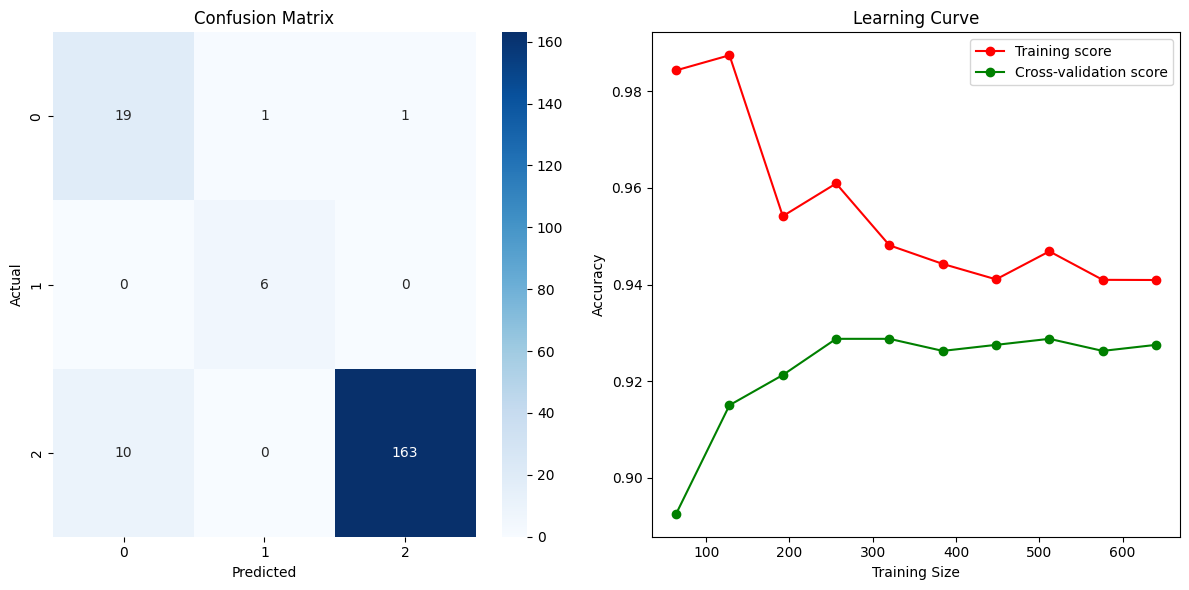

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.90      0.76        21
           1       0.86      1.00      0.92         6
           2       0.99      0.94      0.97       173

    accuracy                           0.94       200
   macro avg       0.84      0.95      0.88       200
weighted avg       0.95      0.94      0.94       200

Tuned hyperparameters (best parameters):  {'var_smoothing': 1e-06}
Best cross-validation accuracy:  0.9349999999999999
Avg F1-score: 0.9443
Jaccard score: 0.9004


In [26]:
parameters = {
    'var_smoothing': np.logspace(0, -9, num=10)  # Range of smoothing values
}

gnb = GaussianNB()
gnb_cv = GridSearchCV(estimator=gnb, param_grid=parameters, cv=10, scoring='accuracy')
gnb_cv.fit(X_train, y_train)
yhat_gnb = gnb_cv.best_estimator_.predict(X_test)
results_df = evaluate_classification_model(gnb_cv.best_estimator_, X_train, X_test, y_train, y_test, 'GaussianNB (Tuned)', results_df)

print("Tuned hyperparameters (best parameters): ", gnb_cv.best_params_)
print("Best cross-validation accuracy: ", gnb_cv.best_score_)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat_gnb, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat_gnb, average='weighted'))

**SVC**

SVC (Tuned) Cross-Validation: 0.9350 (0.0156)


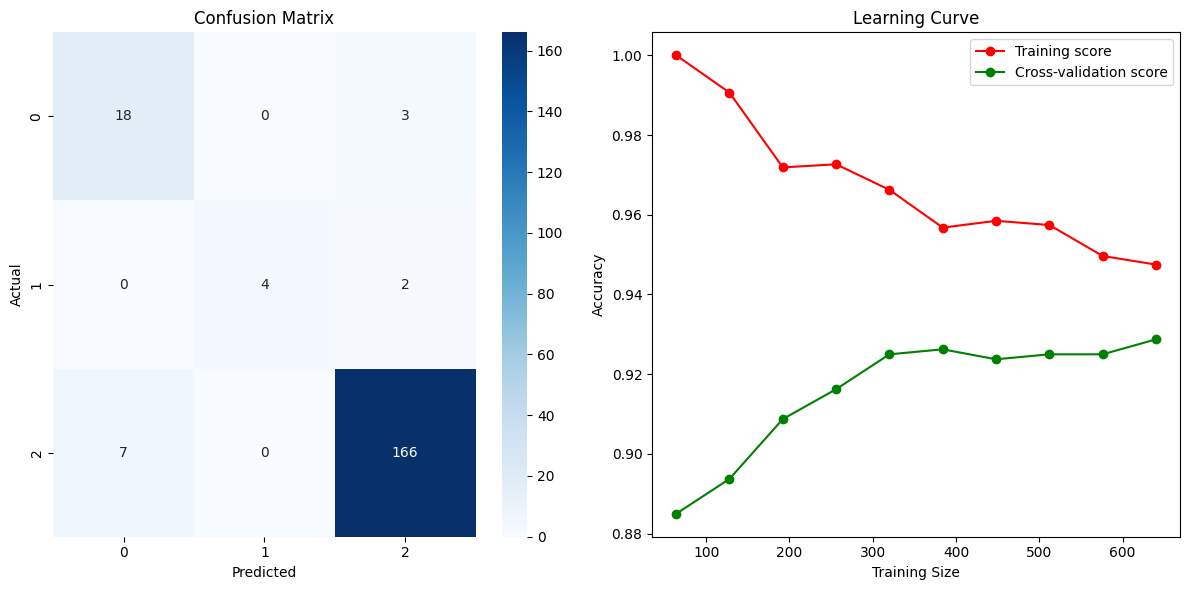

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.86      0.78        21
           1       1.00      0.67      0.80         6
           2       0.97      0.96      0.97       173

    accuracy                           0.94       200
   macro avg       0.90      0.83      0.85       200
weighted avg       0.95      0.94      0.94       200

Tuned hyperparameters (best parameters):  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy:  0.9225
Avg F1-score: 0.9410
Jaccard score: 0.8942


In [27]:
parameters = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 0.1]
}

svc = SVC()
svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=10, scoring='accuracy')
svc_cv.fit(X_train, y_train)
yhat_svc = svc_cv.best_estimator_.predict(X_test)
results_df = evaluate_classification_model(svc_cv.best_estimator_, X_train, X_test, y_train, y_test, 'SVC (Tuned)', results_df)

print("Tuned hyperparameters (best parameters): ", svc_cv.best_params_)
print("Best cross-validation accuracy: ", svc_cv.best_score_)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat_svc, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat_svc, average='weighted'))

**Random Forest Classifier**

Random Forest (Tuned) Cross-Validation: 0.9825 (0.0073)


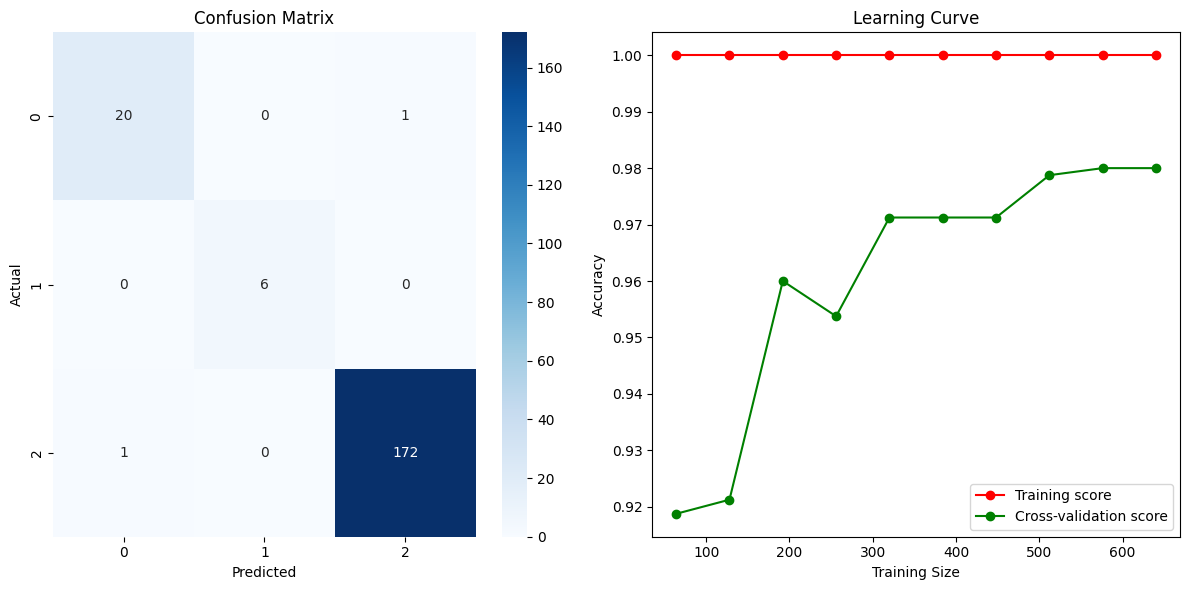

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       1.00      1.00      1.00         6
           2       0.99      0.99      0.99       173

    accuracy                           0.99       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.99      0.99       200

Tuned hyperparameters (best parameters):  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy:  0.98125
Avg F1-score: 0.9848
Jaccard score: 0.9709


In [28]:
parameters = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'max_features': ['sqrt']
}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(estimator=rf, param_grid=parameters, cv=10, scoring='accuracy')
rf_cv.fit(X_train, y_train)
yhat_rf = rf_cv.best_estimator_.predict(X_test)
results_df = evaluate_classification_model(rf_cv.best_estimator_, X_train, X_test, y_train, y_test, 'Random Forest (Tuned)', results_df)

print("Tuned hyperparameters (best parameters): ", rf_cv.best_params_)
print("Best cross-validation accuracy: ", rf_cv.best_score_)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat_rf, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat_rf, average='weighted'))

**Decision Tree Classifier**

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Decision Tree (Tuned) Cross-Validation: 0.9662 (0.0129)


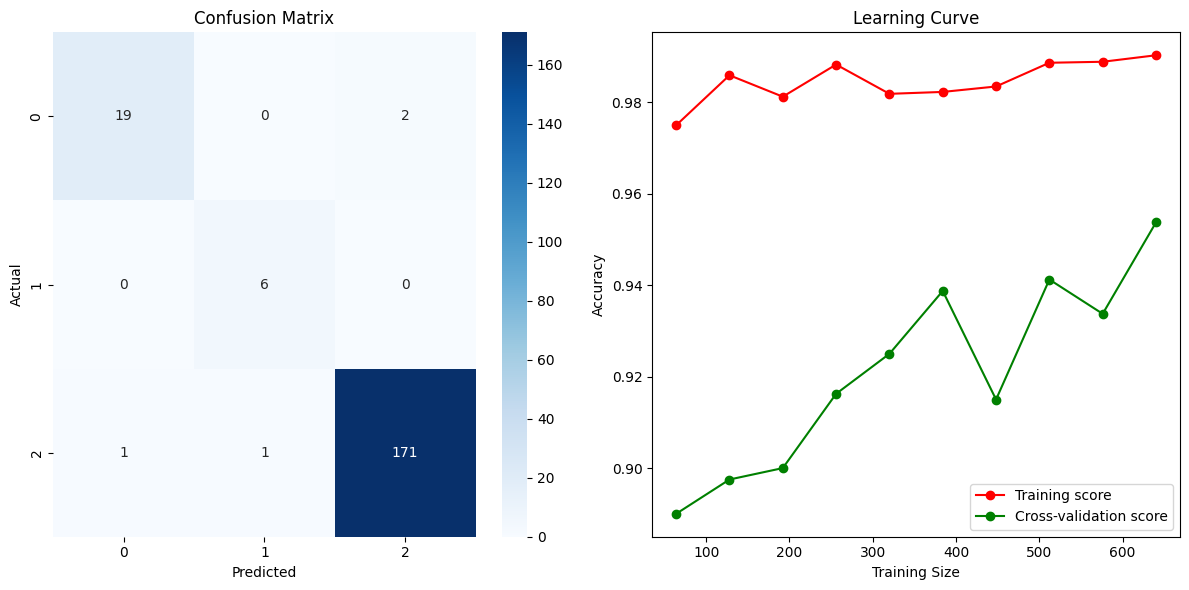

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.86      1.00      0.92         6
           2       0.99      0.99      0.99       173

    accuracy                           0.98       200
   macro avg       0.93      0.96      0.95       200
weighted avg       0.98      0.98      0.98       200

Tuned hyperparameters (best parameters):  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validation accuracy:  0.9525
Avg F1-score: 0.9707
Jaccard score: 0.9448


In [29]:
parameters = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

dt = DecisionTreeClassifier()

dt_cv = GridSearchCV(estimator=dt, param_grid=parameters, cv=10, scoring='accuracy')
dt_cv.fit(X_train, y_train)
yhat_dt = dt_cv.best_estimator_.predict(X_test)
results_df = evaluate_classification_model(dt_cv.best_estimator_, X_train, X_test, y_train, y_test, 'Decision Tree (Tuned)', results_df)

print("Tuned hyperparameters (best parameters): ", dt_cv.best_params_)
print("Best cross-validation accuracy: ", dt_cv.best_score_)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat_dt, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat_dt, average='weighted'))

**XGB Classifier**

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:23:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:23:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:23:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:23:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:23:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost (Tuned) Cross-Validation: 0.9838 (0.0075)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:23:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:23:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:23:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:23:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:23:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

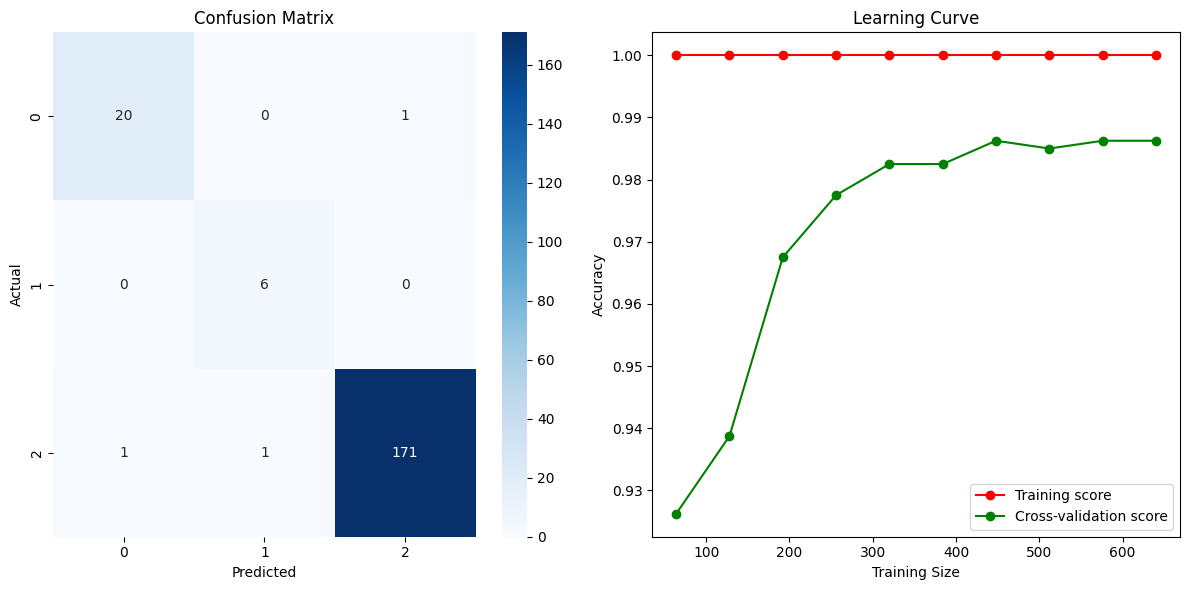

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.86      1.00      0.92         6
           2       0.99      0.99      0.99       173

    accuracy                           0.98       200
   macro avg       0.93      0.98      0.96       200
weighted avg       0.99      0.98      0.99       200

Tuned hyperparameters (best parameters):  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best cross-validation accuracy:  0.9862500000000001
Avg F1-score: 0.9852
Jaccard score: 0.9713


In [30]:
parameters = {
    'n_estimators': [100],
    'max_depth': [3, 5],
    'learning_rate': [0.1],
    'subsample': [0.7],
}

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_cv = GridSearchCV(estimator=xgb_model, param_grid=parameters, cv=10, scoring='accuracy')
xgb_cv.fit(X_train, y_train)
yhat_xgb = xgb_cv.best_estimator_.predict(X_test)
results_df = evaluate_classification_model(xgb_cv.best_estimator_, X_train, X_test, y_train, y_test, 'XGBoost (Tuned)', results_df)

print("Tuned hyperparameters (best parameters): ", xgb_cv.best_params_)
print("Best cross-validation accuracy: ", xgb_cv.best_score_)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat_xgb, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat_xgb, average='weighted'))

## **Model Selection**

In [31]:
results_df

Model  Accuracy  F1-Score  Jaccard Score
0  Logistic Regression (Tuned)     0.940  0.938082       0.895951
1                  KNN (Tuned)     0.960  0.962412       0.933397
2           GaussianNB (Tuned)     0.940  0.944258       0.900385
3                  SVC (Tuned)     0.940  0.940999       0.894185
4        Random Forest (Tuned)     0.990  0.990000       0.980512
5        Decision Tree (Tuned)     0.980  0.980009       0.961625
6              XGBoost (Tuned)     0.985  0.985171       0.971255

**Best ML Model:** Based on above results, the best model is Random Forest Classifier with Accuracy of 0.99 and Cross-Validation Accuracy of 0.98.

**Machine Learning Problem Resolved:**
The machine learning problem addressed was the early detection of diabetes based on various parameters, enabling timely intervention and better management of the disease